In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as tsa
from numpy import log

In [35]:
# descendente

df_desc = pd.read_csv("data/D_EGMS_L2b_052_0848_IW2_VV_2018_2022_1/EGMS_L2b_052_0848_IW2_VV_2018_2022_1.csv")
df_desc

,pid,mp_type,latitude,longitude,easting,northing,height,height_wgs84,line,pixel,...,20220828,20220921,20221003,20221015,20221027,20221108,20221120,20221202,20221214,20221226
0,4EM4h00p9W,0,38.287827,-7.313592,2810418.62,1861752.34,188.4,243.6,3,26,...,-13.0,-17.9,-13.2,-9.5,-7.1,-10.0,-10.7,-5.1,1.3,-9.6
1,4EM4h00H9R,0,38.290389,-7.329763,2809092.68,1862350.97,178.6,233.8,1,397,...,-7.3,-3.3,-6.8,-6.5,-2.9,-6.0,-5.2,-4.5,-6.7,-17.7
2,4EM4h00H9S,0,38.290389,-7.329764,2809092.61,1862351.00,175.7,230.9,1,398,...,-10.9,-5.8,-10.5,-6.0,-4.8,-8.9,-3.9,-3.9,-8.3,-5.4
3,4EM4h00HCp,0,38.291697,-7.338938,2808337.19,1862674.94,173.2,228.4,1,607,...,-11.8,-8.5,-13.8,-13.0,-8.4,-10.5,-13.7,-12.6,-10.3,-4.1
4,4EM4h00YFr,0,38.291568,-7.338934,2808334.67,1862660.96,171.0,226.2,2,607,...,-11.5,-9.5,-13.0,-9.5,-7.3,-11.4,-13.0,-12.3,-10.6,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208508,4EM4h6XNQc,0,38.182821,-7.901842,2757712.02,1862267.26,182.5,237.6,1474,12838,...,-0.4,2.1,-0.4,-1.0,-2.2,-0.9,-2.4,-0.6,0.7,7.4
208509,4EM4h6XNQg,0,38.182834,-7.901934,2757704.46,1862270.53,177.2,232.2,1474,12842,...,-0.4,0.7,-3.2,-1.2,-14.0,7.4,7.4,8.0,-6.5,-10.7
208510,4EM4h6XNR1,0,38.182957,-7.902829,2757630.81,1862302.28,179.2,234.2,1474,12863,...,-4.4,-1.3,-3.8,-4.3,-2.8,-1.9,-4.8,-1.4,-2.6,-1.9
208511,4EM4h6XNR9,0,38.182996,-7.903111,2757607.61,1862312.29,175.6,230.7,1474,12871,...,-4.7,3.7,-1.9,-5.4,-6.1,-3.5,1.0,-2.9,4.7,-5.1


In [36]:
# ascendente

df_asc = pd.read_csv("data/A_EGMS_L2b_147_0224_IW2_VV_2018_2022_1/EGMS_L2b_147_0224_IW2_VV_2018_2022_1.csv")
df_asc

,pid,mp_type,latitude,longitude,easting,northing,height,height_wgs84,line,pixel,...,20220903,20220915,20220927,20221009,20221021,20221102,20221114,20221126,20221208,20221220
0,4eR7j0000N,0,38.027669,-7.743108,2767734.72,1842233.16,174.2,229.2,0,23,...,14.4,6.8,5.3,8.9,17.4,8.1,18.2,-2.0,14.4,11.2
1,4eR7j0002I,0,38.028435,-7.737754,2768211.41,1842206.93,181.8,236.8,0,142,...,12.1,-2.5,9.9,3.9,16.2,10.7,4.6,-8.1,14.2,10.1
2,4eR7j0002J,0,38.028443,-7.737698,2768216.36,1842206.66,182.5,237.5,0,143,...,0.8,0.2,1.6,-1.2,-2.8,2.5,-7.3,-14.7,6.7,1.7
3,4eR7j000Bf,0,38.032130,-7.711935,2770510.17,1842080.58,201.4,256.4,0,723,...,-0.3,-5.7,-4.3,-2.4,-1.0,-1.5,-0.1,-5.2,-7.1,-5.6
4,4eR7j000Ei,0,38.033271,-7.703953,2771220.81,1842041.59,181.4,236.4,0,912,...,9.7,0.4,-0.5,3.8,5.0,0.7,1.6,2.5,1.4,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445602,4eR7j6T1Ze,0,38.347022,-6.778984,2857484.37,1857721.01,511.2,566.6,1458,24094,...,-8.6,-6.9,-2.7,-5.1,-6.3,-5.3,-4.6,-9.8,-12.3,-7.4
445603,4eR7j6TIcf,1307,38.347140,-6.779055,2857480.84,1857735.14,510.8,566.2,1459,24093,...,-3.8,-2.7,1.6,0.3,1.4,3.0,2.4,-2.7,-1.9,-0.0
445604,4eR7j6TIcg,0,38.347146,-6.779006,2857485.25,1857734.90,511.6,567.0,1459,24094,...,-8.7,-8.2,-4.4,-5.3,-5.9,-4.9,-4.0,-9.6,-9.7,-6.4
445605,4eR7j6T1dx,0,38.348456,-6.768261,2858433.81,1857670.37,526.1,581.6,1458,24361,...,4.6,-2.8,5.9,6.6,8.0,-1.0,0.9,-5.6,8.9,9.6


In [3]:
#df9 = df1.head(12)
#df9=df9.T
df9=df1.T
df9.index = pd.to_datetime(df9.index)
df9.index.name = 'date'
df9

df9.columns = df9.columns.map(lambda x: f'P{x+1}')

df9

#view list of stationary columns
#print(col_list)

print("Observations of Dickey-fuller test \n")
print("Stationary points \n")

adf_results = {}
col_list = []
for col in df9.columns.values:
    dftest = adfuller(df9[col],autolag='AIC')
    if dftest[1] < 0.05:
        col_list.append(1);
        #print(col + " is stationary")
    else:
        col_list.append(0);
       # print(col + " is not stationary")
#view list of stationary columns
print(col_list)

NameError: name 'df1' is not defined

In [ ]:
#filtr=(df9.easting >= 2790000) & (result2.northing <= 1805000) 
#result2[filt]

In [ ]:
dados=df.loc[:, ['pid', 'easting', 'northing','height','rmse','mean_velocity','mean_velocity_std','acceleration','acceleration_std','seasonality','seasonality_std']]
#dados=df.T.agg(['pid','easting','northing','height','rmse','mean_velocity','seasonality'])

In [ ]:
dados

In [4]:
new_df= dados.assign(stationary=col_list)
new_df


NameError: name 'dados' is not defined

In [5]:
#graph.plot(subplots=True, layout=(3,4), figsize=(11,5))

In [6]:
#B=df.T.iloc[11:315,:].agg(['min'])

In [7]:
#B.head()

In [8]:
#result1 = pd.concat([dados, B.T, A.T, ], axis=1, join='inner')
#result1

In [9]:
#print("Observations of Dickey-fuller test \n")
#print("stationary columns \n")

#adf_results = {}
#col_list = []
#for col in df1t.columns.values:
#    dftest = adfuller(df1t[col],autolag='AIC')
#    if dftest[1] < 0.05:
#        col_list.append(col)
#        print(col + " is stationary")
#view list of stationary columns
#print(col_list)

In [10]:
result2 = pd.concat([result, df1, ], axis=1, join='inner')
result2

NameError: name 'result' is not defined

In [11]:
#filt = result2.loc[(result2['easting'] >= 2700100)]

filt=(result2.easting >= 2790000) & (result2.northing <= 1805000) 
result2[filt]

NameError: name 'result2' is not defined

In [10]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,217253,217254,217255,217256,217257,217258,217259,217260,217261,217262
pid,40Lx4gNRcm,40LxpZ1tZQ,40LxuFh8lU,40LxywMNxY,40Ly3d1d9c,40Ly8JgsLg,40Lze4zmEy,40M0AteUbQ,40M0FaJjnU,40M0KGyyzY,...,40N3M55kb9,40N3VSQEzH,40N3a95UBL,40N6pjh1Y7,40N6z71VwF,40N73ngl8J,40N8LUzvRP,40N9YVdqYR,40N9hsyKwZ,40N9mZda8d
easting,2700050,2700050,2700050,2700050,2700050,2700050,2700050,2700050,2700050,2700050,...,2799950,2799950,2799950,2799950,2799950,2799950,2799950,2799950,2799950,2799950
northing,1800050,1801050,1801150,1801250,1801350,1801450,1803450,1804150,1804250,1804350,...,1890350,1890550,1890650,1894950,1895150,1895250,1896950,1898550,1898750,1898850
height,130.8,120.1,123.1,125.8,121.1,126.1,217.3,208.4,220.7,233.4,...,272.6,285.4,291.8,264.2,262.8,264.4,267.2,276.8,266.4,271.8
rmse,2.3,1.4,1.9,2.4,1.7,2.9,2.3,4.2,2.7,3.1,...,2.0,2.8,2.7,3.5,1.2,2.6,4.2,2.9,3.2,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201203,-6.8,0.8,-2.7,-10.6,-10.1,-2.4,-14.1,-6.2,-9.6,-11.0,...,-7.4,-4.3,-19.8,8.5,-7.5,-6.2,-0.0,3.3,-3.3,-2.2
20201209,-12.1,2.6,-1.5,-9.5,-8.6,-5.0,-10.8,-2.1,-8.0,-7.8,...,-6.6,-4.6,-19.4,7.0,-7.7,-6.9,1.6,3.0,-5.1,-5.0
20201215,-11.6,2.5,-2.9,-11.2,-8.3,-5.8,-10.9,-3.4,-7.6,-12.0,...,-7.4,-1.9,-16.8,5.1,-7.2,-6.1,1.3,-0.2,-0.7,-1.5
20201221,-13.3,2.5,-1.5,-10.2,-9.3,-6.4,-11.1,0.3,-7.6,-13.8,...,-9.1,-3.6,-10.4,4.7,-7.5,-5.0,3.9,-0.4,1.8,0.6


In [6]:
df1=df[df.columns.drop(['pid','easting', 'northing','height','rmse','mean_velocity','mean_velocity_std','acceleration','acceleration_std','seasonality','seasonality_std'])]

In [7]:
df1.head()

,20160105,20160111,20160117,20160123,20160129,20160204,20160210,20160216,20160222,20160228,...,20201103,20201109,20201115,20201121,20201127,20201203,20201209,20201215,20201221,20201227
0,-1.6,-0.8,-0.9,-1.8,-1.6,-0.7,-0.4,0.0,0.7,0.8,...,-9.5,-9.2,-7.8,-8.0,-9.1,-10.2,-9.0,-9.4,-9.2,-8.3
1,-0.4,-0.4,-0.4,0.0,0.3,0.1,0.0,-0.1,-0.4,-0.5,...,-6.1,-5.7,-5.7,-6.1,-5.6,-5.3,-6.0,-5.8,-6.1,-6.3
2,-0.5,-0.1,0.4,0.6,0.5,0.4,0.0,-0.7,-1.0,-0.6,...,-3.9,-4.1,-5.1,-5.4,-5.8,-5.4,-4.8,-5.3,-6.4,-6.5
3,-0.4,-0.9,-1.0,-1.0,-1.1,-1.3,-0.8,0.3,1.0,1.3,...,-7.7,-7.6,-8.0,-7.7,-8.0,-8.3,-8.1,-8.0,-7.1,-7.4
4,-1.0,-1.4,-0.1,2.9,3.6,1.3,-0.5,-0.7,-0.7,-1.3,...,-8.7,-9.6,-8.3,-8.1,-8.4,-7.7,-9.0,-10.7,-8.2,-8.8


In [13]:
#A=df1.T.agg(['max'])

In [14]:
#A

In [8]:
df1.T.head()

,0,1,2,3,4,5,6,7,8,9,...,374826,374827,374828,374829,374830,374831,374832,374833,374834,374835
20160105,-1.6,-0.4,-0.5,-0.4,-1.0,0.1,-1.0,-0.0,-0.9,1.5,...,-0.1,-1.0,1.2,-0.1,-0.6,-3.1,2.1,5.9,1.4,2.1
20160111,-0.8,-0.4,-0.1,-0.9,-1.4,0.1,-0.4,1.0,0.0,1.1,...,-0.2,-1.1,0.3,0.6,-3.4,-2.0,2.5,3.0,1.5,3.3
20160117,-0.9,-0.4,0.4,-1.0,-0.1,0.4,0.1,1.2,0.2,0.5,...,0.5,-1.2,0.8,-0.3,-4.8,-2.1,-0.1,-1.1,0.2,3.8
20160123,-1.8,0.0,0.6,-1.0,2.9,0.9,0.4,1.0,-0.4,0.0,...,0.8,-1.0,0.7,-1.1,-4.5,-2.1,-0.9,-3.7,-0.6,3.5
20160129,-1.6,0.3,0.5,-1.1,3.6,0.4,0.2,0.7,-0.4,-0.2,...,0.3,-0.5,-0.1,-1.2,-1.9,-1.0,0.8,-3.6,-0.6,1.0


In [9]:
df1t=df1.T

In [10]:
df1t.index = pd.to_datetime(df1t.index)

In [11]:
df1t.head()

,0,1,2,3,4,5,6,7,8,9,...,374826,374827,374828,374829,374830,374831,374832,374833,374834,374835
2016-01-05,-1.6,-0.4,-0.5,-0.4,-1.0,0.1,-1.0,-0.0,-0.9,1.5,...,-0.1,-1.0,1.2,-0.1,-0.6,-3.1,2.1,5.9,1.4,2.1
2016-01-11,-0.8,-0.4,-0.1,-0.9,-1.4,0.1,-0.4,1.0,0.0,1.1,...,-0.2,-1.1,0.3,0.6,-3.4,-2.0,2.5,3.0,1.5,3.3
2016-01-17,-0.9,-0.4,0.4,-1.0,-0.1,0.4,0.1,1.2,0.2,0.5,...,0.5,-1.2,0.8,-0.3,-4.8,-2.1,-0.1,-1.1,0.2,3.8
2016-01-23,-1.8,0.0,0.6,-1.0,2.9,0.9,0.4,1.0,-0.4,0.0,...,0.8,-1.0,0.7,-1.1,-4.5,-2.1,-0.9,-3.7,-0.6,3.5
2016-01-29,-1.6,0.3,0.5,-1.1,3.6,0.4,0.2,0.7,-0.4,-0.2,...,0.3,-0.5,-0.1,-1.2,-1.9,-1.0,0.8,-3.6,-0.6,1.0


In [12]:
df1t.index.name = 'date'

In [13]:
df1t.columns = df1t.columns.map(lambda x: f'column_{x+1}')

In [14]:
df1t.head()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_374827,column_374828,column_374829,column_374830,column_374831,column_374832,column_374833,column_374834,column_374835,column_374836
date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-1.6,-0.4,-0.5,-0.4,-1.0,0.1,-1.0,-0.0,-0.9,1.5,...,-0.1,-1.0,1.2,-0.1,-0.6,-3.1,2.1,5.9,1.4,2.1
2016-01-11,-0.8,-0.4,-0.1,-0.9,-1.4,0.1,-0.4,1.0,0.0,1.1,...,-0.2,-1.1,0.3,0.6,-3.4,-2.0,2.5,3.0,1.5,3.3
2016-01-17,-0.9,-0.4,0.4,-1.0,-0.1,0.4,0.1,1.2,0.2,0.5,...,0.5,-1.2,0.8,-0.3,-4.8,-2.1,-0.1,-1.1,0.2,3.8
2016-01-23,-1.8,0.0,0.6,-1.0,2.9,0.9,0.4,1.0,-0.4,0.0,...,0.8,-1.0,0.7,-1.1,-4.5,-2.1,-0.9,-3.7,-0.6,3.5
2016-01-29,-1.6,0.3,0.5,-1.1,3.6,0.4,0.2,0.7,-0.4,-0.2,...,0.3,-0.5,-0.1,-1.2,-1.9,-1.0,0.8,-3.6,-0.6,1.0


In [22]:
df1t['Tiago'] = df1t['column_1'] * 2

In [15]:
df1t.head()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_374827,column_374828,column_374829,column_374830,column_374831,column_374832,column_374833,column_374834,column_374835,column_374836
date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-1.6,-0.4,-0.5,-0.4,-1.0,0.1,-1.0,-0.0,-0.9,1.5,...,-0.1,-1.0,1.2,-0.1,-0.6,-3.1,2.1,5.9,1.4,2.1
2016-01-11,-0.8,-0.4,-0.1,-0.9,-1.4,0.1,-0.4,1.0,0.0,1.1,...,-0.2,-1.1,0.3,0.6,-3.4,-2.0,2.5,3.0,1.5,3.3
2016-01-17,-0.9,-0.4,0.4,-1.0,-0.1,0.4,0.1,1.2,0.2,0.5,...,0.5,-1.2,0.8,-0.3,-4.8,-2.1,-0.1,-1.1,0.2,3.8
2016-01-23,-1.8,0.0,0.6,-1.0,2.9,0.9,0.4,1.0,-0.4,0.0,...,0.8,-1.0,0.7,-1.1,-4.5,-2.1,-0.9,-3.7,-0.6,3.5
2016-01-29,-1.6,0.3,0.5,-1.1,3.6,0.4,0.2,0.7,-0.4,-0.2,...,0.3,-0.5,-0.1,-1.2,-1.9,-1.0,0.8,-3.6,-0.6,1.0


In [16]:
df1t['values'] = df1t['column_1'] + df1t['column_2']

In [17]:
df1t.head()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_374828,column_374829,column_374830,column_374831,column_374832,column_374833,column_374834,column_374835,column_374836,values
date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-1.6,-0.4,-0.5,-0.4,-1.0,0.1,-1.0,-0.0,-0.9,1.5,...,-1.0,1.2,-0.1,-0.6,-3.1,2.1,5.9,1.4,2.1,-2.0
2016-01-11,-0.8,-0.4,-0.1,-0.9,-1.4,0.1,-0.4,1.0,0.0,1.1,...,-1.1,0.3,0.6,-3.4,-2.0,2.5,3.0,1.5,3.3,-1.2
2016-01-17,-0.9,-0.4,0.4,-1.0,-0.1,0.4,0.1,1.2,0.2,0.5,...,-1.2,0.8,-0.3,-4.8,-2.1,-0.1,-1.1,0.2,3.8,-1.3
2016-01-23,-1.8,0.0,0.6,-1.0,2.9,0.9,0.4,1.0,-0.4,0.0,...,-1.0,0.7,-1.1,-4.5,-2.1,-0.9,-3.7,-0.6,3.5,-1.8
2016-01-29,-1.6,0.3,0.5,-1.1,3.6,0.4,0.2,0.7,-0.4,-0.2,...,-0.5,-0.1,-1.2,-1.9,-1.0,0.8,-3.6,-0.6,1.0,-1.3


In [18]:
print((df1t["column_1"].values[0]) + (df1t["column_1"].values[1]))

-2.4000000000000004


In [19]:
df1t['Declive'] = ((df1t["column_1"].values[1]) - (df1t["column_1"].values[0]))

In [20]:
df1t.head()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_374829,column_374830,column_374831,column_374832,column_374833,column_374834,column_374835,column_374836,values,Declive
date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-1.6,-0.4,-0.5,-0.4,-1.0,0.1,-1.0,-0.0,-0.9,1.5,...,1.2,-0.1,-0.6,-3.1,2.1,5.9,1.4,2.1,-2.0,0.8
2016-01-11,-0.8,-0.4,-0.1,-0.9,-1.4,0.1,-0.4,1.0,0.0,1.1,...,0.3,0.6,-3.4,-2.0,2.5,3.0,1.5,3.3,-1.2,0.8
2016-01-17,-0.9,-0.4,0.4,-1.0,-0.1,0.4,0.1,1.2,0.2,0.5,...,0.8,-0.3,-4.8,-2.1,-0.1,-1.1,0.2,3.8,-1.3,0.8
2016-01-23,-1.8,0.0,0.6,-1.0,2.9,0.9,0.4,1.0,-0.4,0.0,...,0.7,-1.1,-4.5,-2.1,-0.9,-3.7,-0.6,3.5,-1.8,0.8
2016-01-29,-1.6,0.3,0.5,-1.1,3.6,0.4,0.2,0.7,-0.4,-0.2,...,-0.1,-1.2,-1.9,-1.0,0.8,-3.6,-0.6,1.0,-1.3,0.8


<Axes: xlabel='date'>

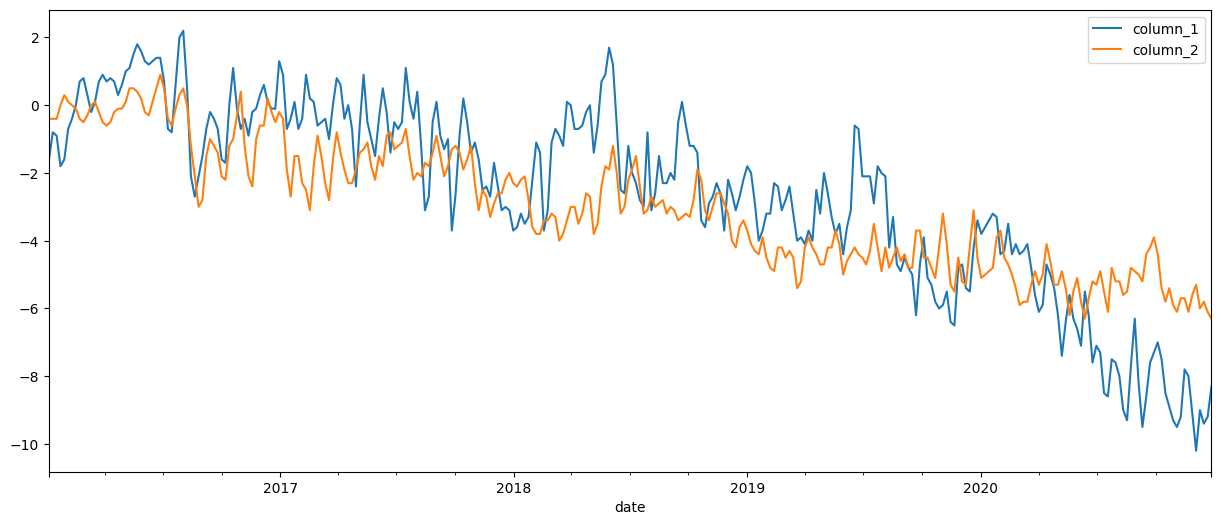

In [21]:
df1t.iloc[:,0:2].plot(figsize=(15,6))

In [22]:
result = adfuller(df1t.iloc[:,0])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.046848397548274266
p-value: 0.9544819761398653
Critical Values:
	1%: -3.4525611751768914
	5%: -2.87132117782556
	10%: -2.5719816428028888


In [23]:
result = adfuller(df1t.iloc[:,0])
result

(np.float64(-0.046848397548274266),
 np.float64(0.9544819761398653),
 6,
 297,
 {'1%': np.float64(-3.4525611751768914),
  '5%': np.float64(-2.87132117782556),
  '10%': np.float64(-2.5719816428028888)},
 np.float64(700.3904228022043))

In [24]:
ADF = adfuller(df1.T.iloc[:,0])
ADF

(np.float64(-0.046848397548274266),
 np.float64(0.9544819761398653),
 6,
 297,
 {'1%': np.float64(-3.4525611751768914),
  '5%': np.float64(-2.87132117782556),
  '10%': np.float64(-2.5719816428028888)},
 np.float64(700.3904228022043))

In [25]:
tsa.adfuller(df1t[col])[1]

NameError: name 'col' is not defined

In [34]:
#print("Observations of Dickey-fuller test \n")
#print("stationary columns \n")

#adf_results = {}

#for col in df1t.columns.values:
#    dftest = adfuller(df1t[col],autolag='AIC')
#    if dftest[1] < 0.05:
#        col_list.append(df1t[[col]])
#        print(col + " is stationary")

In [35]:
#print("Observations of Dickey-fuller test \n")
#print("stationary columns \n")

#adf_results = {}

#for col in df1t.columns.values:
#    dftest = adfuller(df1t[col],autolag='AIC')
#    if dftest[1] > 0.05:
#        col_list.append(df1t[[col]])
#        print(col + " is not stationary")

In [36]:
#print("Observations of Dickey-fuller test \n")
#print("stationary columns \n")

#adf_results = {}

#for col in df1t.columns.values:
#    dftest = adfuller(df1t[col],autolag='AIC')
#    if dftest[1] < 0.05:
#        col_list.append(df1t[[col]])
#        print(col + " is stationary")
#    else:
#        print(col + " is not stationary")

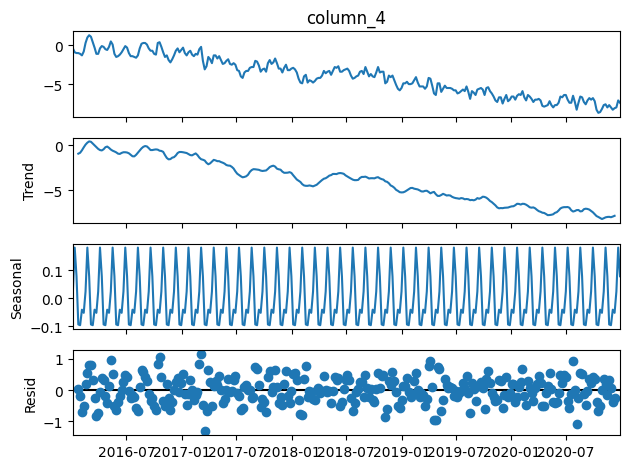

In [26]:
decompose = seasonal_decompose(df1t.iloc[:,3],model='additive', period=7)
decompose.plot()
plt.show()

<Axes: xlabel='date'>

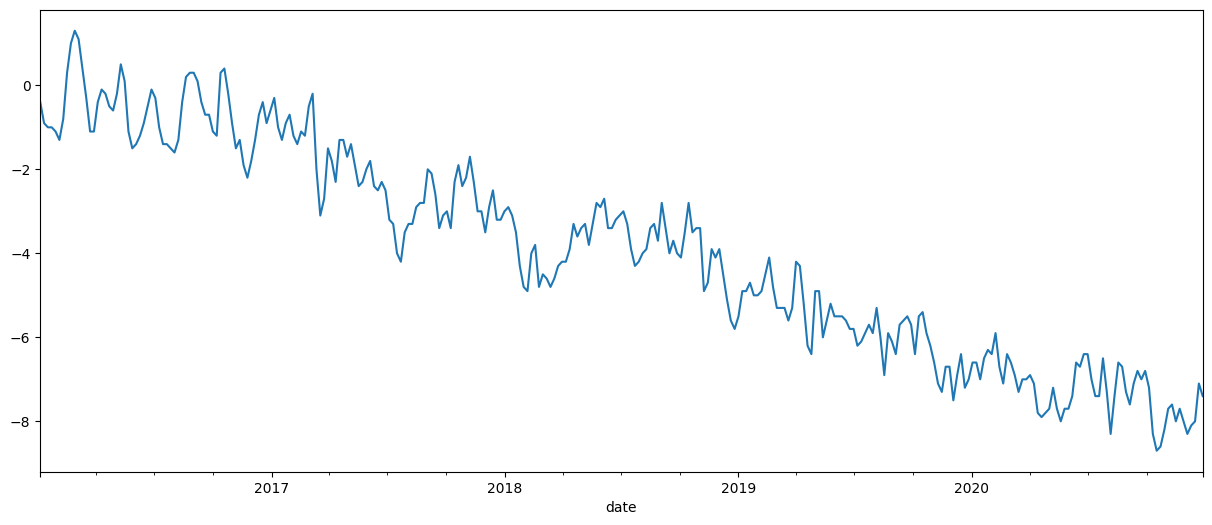

In [27]:
#filtro = (df1t.index.year <2017) 
#df1t[filtro].iloc[:,3].plot(figsize=(15,6))
df1t.iloc[:,3].plot(figsize=(15,6))

In [39]:
result = adfuller(df1t[filtro].iloc[:,3])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

NameError: name 'filtro' is not defined

In [ ]:
#df1t.iloc[:, 0:2].plot(style = 'k.')
#df1t.iloc[:, 0:2].plot()

In [ ]:
matriz=df1t.agg(['min','max','mean','std'])

In [ ]:
#matriz.T

In [ ]:
#df1t.column_1.plot(figsize=(15,6))

In [ ]:
#filtro=(df1t.index.year >= 2018) & (df1t.index.year <= 2019) 
#df1t[filtro].column_1.plot()

In [ ]:
#df1t.column_1.diff().plot(figsize=(15,6))

In [ ]:
#df1t[filtro].column_1.diff().plot()

In [ ]:
#dia = pd.Timestamp('2016-01-05')

In [ ]:
#dia

In [ ]:
#dia.day_name()

In [ ]:
#dia2 = dia + pd.Timedelta('1 day')

In [ ]:
#dia2

In [ ]:
#pd.date_range('2016-01-06', freq='D', periods=365)

In [ ]:
#index = pd.date_range('2016-01-06', freq='H', periods=10)

In [ ]:
#index